# NLP Basics and Important terms

```
- [S22] Natural Language Processing, Innopolis University 
- Professor: Vladimir Ivanov 
- Teaching Assistant: Gcinizwe Dlamini
```
<hr>

```
Plan : 
  1. Introduction
  2. Important terms
  3. Basics
  4. Assignment 1
```


## 1. **NLP Pipeline**
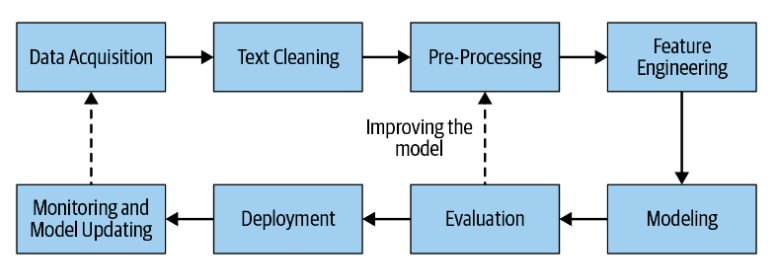

## 2. Important terms

Natural Language Processing (NLP) is the task of making computers understand and produce human languages.

## What is a Corpus?

The list of available NLTK corpora is given at: https://www.nltk.org/nltk_data/


Examlpe of popular and most commonly used corpus : `brown` :
The Corpus is divided into 500 samples of 2000+ words each.

In [5]:
import nltk
from nltk.corpus import brown #, movie_reviews, reuters

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

nltk.download('brown')
# nltk.download('reuters') nltk.download('movie_reviews')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping help\tagsets.zip.
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


True

In [6]:
brown.sents()[0]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of',
 "Atlanta's",
 'recent',
 'primary',
 'election',
 'produced',
 '``',
 'no',
 'evidence',
 "''",
 'that',
 'any',
 'irregularities',
 'took',
 'place',
 '.']

## Sentence Segmentation

Breaking up text into sentences at the appearance of full stops and question marks.

**What could go wrong here?**

In [7]:
from nltk.tokenize import sent_tokenize

text = """Extreme value theory in more than one variable introduces additional issues that have to be addressed. 
One problem that arises is that one must specify what constitutes an extreme event.[20] Although this is straightforward in the univariate case, 
there is no unambiguous way to do this in the multivariate case. The fundamental problem is that although it is 
possible to order a set of real-valued numbers, there is no natural way to order a set of vectors. at a specific 
time and the values at a later time. Which of these events would be considered more extreme? There is no universal 
answer to this question (e.g., Chapters 4–7).
"""

In [8]:
all_sentences = sent_tokenize(text)
all_sentences

['Extreme value theory in more than one variable introduces additional issues that have to be addressed.',
 'One problem that arises is that one must specify what constitutes an extreme event.',
 '[20] Although this is straightforward in the univariate case, \nthere is no unambiguous way to do this in the multivariate case.',
 'The fundamental problem is that although it is \npossible to order a set of real-valued numbers, there is no natural way to order a set of vectors.',
 'at a specific \ntime and the values at a later time.',
 'Which of these events would be considered more extreme?',
 'There is no universal \nanswer to this question (e.g., Chapters 4–7).']

## Tokenization

Similar to sentence tokenization, to tokenize a sentence into words, we can start with a simple rule to split text into words based on the presence of punctuation marks.

There are different Tokenization techniques :

1. White Space Tokenization
1. Dictionary Based Tokenization
1. Rule Based Tokenization
1. Regular Expression Tokenizer
1. Penn TreeBank Tokenization
1. Spacy Tokenizer
1. Byte-Pair Encoding (BPE)

We will look at some of them but you can experiment with the rest

## White Space Tokenization

Given a sentence or paragraph it tokenizes into words by splitting the input whenever a white space in encountered. This is the fastest tokenization technique but will work for languages in which the white space breaks apart the sentence into meaningful words. 

### What could be a disadvantage of this method? 

**TODO:** Implement a simple tokenizer using :    
1. Pure python without any libraries
2. NLTK library 
3. Regular expression `regex`

Compare the 3 implementations outputs

In [24]:
#TODO : Write code here

# Tokenizing using pure python
def tokenize_python(corpus):
    tokens = corpus.split()
    return tokens

# Tokenize with NLTK
from nltk.tokenize import WhitespaceTokenizer
def tokenize_nltk(corpus):
    tokens = WhitespaceTokenizer().tokenize(corpus)
    return tokens

#tokenize with regex
import re
def tokenize_regex(corpus):
    expr = "[ ]"
    tokens = re.split(expr, corpus)
    return tokens

print(tokenize_regex(text))



['Extreme', 'value', 'theory', 'in', 'more', 'than', 'one', 'variable', 'introduces', 'additional', 'issues', 'that', 'have', 'to', 'be', 'addressed.', '\nOne', 'problem', 'that', 'arises', 'is', 'that', 'one', 'must', 'specify', 'what', 'constitutes', 'an', 'extreme', 'event.[20]', 'Although', 'this', 'is', 'straightforward', 'in', 'the', 'univariate', 'case,', '\nthere', 'is', 'no', 'unambiguous', 'way', 'to', 'do', 'this', 'in', 'the', 'multivariate', 'case.', 'The', 'fundamental', 'problem', 'is', 'that', 'although', 'it', 'is', '\npossible', 'to', 'order', 'a', 'set', 'of', 'real-valued', 'numbers,', 'there', 'is', 'no', 'natural', 'way', 'to', 'order', 'a', 'set', 'of', 'vectors.', 'at', 'a', 'specific', '\ntime', 'and', 'the', 'values', 'at', 'a', 'later', 'time.', 'Which', 'of', 'these', 'events', 'would', 'be', 'considered', 'more', 'extreme?', 'There', 'is', 'no', 'universal', '\nanswer', 'to', 'this', 'question', '(e.g.,', 'Chapters', '4–7).\n']


## Dictionary Based Tokenization

Tokens are found based on the tokens already existing in the dictionary. If the token is not found, then special rules are used to tokenize it. It is an advanced technique compared to whitespace tokenizer.

### Penn TreeBank Tokenization

Steps: 
- split standard contractions, e.g. ``don't`` -> ``do n't`` and ``they'll`` -> ``they 'll``
- treat most punctuation characters as separate tokens
- split off commas and single quotes, when followed by whitespace
- separate periods that appear at the end of line

**TODO:** Implement the Penn TreeBank Tokenization using `re` in python and compare the results with NLTK

In [47]:
from nltk.tokenize import TreebankWordTokenizer

a = "don't be' late I'll be--sad"
print(TreebankWordTokenizer().tokenize(a))

# TODO : Write your code here
# TODO : HOW?
def treebank_regex(corpus):
    # split commas followed by whitespaces
    expr = ", "
    # split single quotes followed be whitespace
    expr = "' "
    # periods appearing at the end of line
    expr = ".\n"
    expr = "\w\W"
    tokens = re.split(expr, corpus)
    return tokens

print(treebank_regex(a))

['do', "n't", 'be', "'", 'late', 'I', "'ll", 'be', '--', 'sad']
['do', '', 'b', ' lat', '', 'l', 'b', '-sad']


## Regular Expression Tokenizer

Its a dynamic rules-based tokenization

Regular expressions Tokenizer splits the texts by searching matches of a specific search pattern. 

For example, a tokenizer that forms the tokens out of money expressions and any other non-whitespace sequences.

**TODO : retrieve any .html page and tokenize the text using regex and NLTK RegexpTokenizer()** 



In [49]:
from nltk.tokenize import RegexpTokenizer
text = "The cost of the OCE excursions - from 200 rubles. up to  ₽350., Moscow and Moscow region from  ₽750. up to  ₽1000"
reg_expr = "\w+|\₽[\d\d].]+\s+"
tokenizer = RegexpTokenizer(reg_expr)
result = tokenizer.tokenize(text)

In [50]:
print(result)

['The', 'cost', 'of', 'the', 'OCE', 'excursions', 'from', '200', 'rubles', 'up', 'to', '350', 'Moscow', 'and', 'Moscow', 'region', 'from', '750', 'up', 'to', '1000']


In [51]:
from nltk.tokenize import RegexpTokenizer
import re
import requests

#TODO : retrieve any .html page and tokenize the text using regex and RegexpTokenizer

url = "https://math.stackexchange.com/questions/411486/"\
        "understanding-the-singular-value-decomposition-svd"


# TODO. Your code here should parse HTML source page and find contributors of the repository.

r = requests.get(url)
html_doc = r.text

tokenizer = RegexpTokenizer(reg_expr)
result = tokenizer.tokenize(html_doc)
print(result)

['DOCTYPE', 'html', 'html', 'itemscope', 'itemtype', 'https', 'schema', 'org', 'QAPage', 'class', 'html__responsive', 'lang', 'en', 'head', 'title', 'linear', 'algebra', 'Understanding', 'the', 'singular', 'value', 'decomposition', 'SVD', 'Mathematics', 'Stack', 'Exchange', 'title', 'link', 'rel', 'shortcut', 'icon', 'href', 'https', 'cdn', 'sstatic', 'net', 'Sites', 'math', 'Img', 'favicon', 'ico', 'v', '92addaa54d18', 'link', 'rel', 'apple', 'touch', 'icon', 'href', 'https', 'cdn', 'sstatic', 'net', 'Sites', 'math', 'Img', 'apple', 'touch', 'icon', 'png', 'v', '0ae50baa40ed', 'link', 'rel', 'image_src', 'href', 'https', 'cdn', 'sstatic', 'net', 'Sites', 'math', 'Img', 'apple', 'touch', 'icon', 'png', 'v', '0ae50baa40ed', 'link', 'rel', 'search', 'type', 'application', 'opensearchdescription', 'xml', 'title', 'Mathematics', 'Stack', 'Exchange', 'href', 'opensearch', 'xml', 'link', 'rel', 'canonical', 'href', 'https', 'math', 'stackexchange', 'com', 'questions', '411486', 'understandin

In [ ]:
sentence_endings = r"sent*"
my_string = 'my_string on sentence endings'
# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

['my_string on ', 'ence endings']


## Lowercasing

The CAPS in the texts are RATHER irritating although we KNOW the guy is trying to EMPHASIZE on something. However upper or lowercase may not make a difference for the problem in some cases. 

## Stopwords

Removing punctuation and/or numbers is also a common step for many NLP problems, such as text classification

In [ ]:
import nltk 
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from string  import punctuation 

my_corpus = "In the summer's gaily singing 100 times, Of the future isn't thinking \nBut the winter's nearby. \nField was green, it's now reddish, \nHappy @days already vanished"

def preprocess_corpus(texts):
  mystopwords = set(stopwords.words("english")) 
  def remove_stops_digits(tokens):
    return [token.lower() for token in tokens if token not in mystopwords and 
          not token.isdigit() and token not in punctuation]
          
  return [remove_stops_digits(word_tokenize(text)) for text in texts]

In [ ]:
print(my_corpus.split('\n'))
result = preprocess_corpus(my_corpus.split('\n'))
print('\n-----results-------')
print(*result,sep="\n")

## Stemming 

Removing suffixes and reducing a word to some base form such that all different variants of that word can be represented by the same form.


Often we want to map the different forms of the same word to the same root word, e.g. "walks", "walking", "walked" should all be the same as "walk".

The stemming and lemmatization process are hand-written regex rules written find the root word.

**Stemming**: Trying to shorten a word with simple regex rules

In [ ]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

for word in ['walking', 'walks', 'walked']:
    print(porter.stem(word))

## Lemmatization

Lemmatization requires more linguistic knowledge, and modeling and developing efficient lemmatizers remains an open problem in NLP research even now

**Lemmatization**: Trying to find the root word with linguistics rules (with the use of regexes)

A lemma refers to the canonical root word used as a dictionary entry.

NLTK Lemmatization function is based on part-of-speech and WordNet (a lexical database of semantic relations between words)


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

words = ['walking', 'walks', 'walked']
for word in words:
    print(f'{word} -> {wnl.lemmatize(word)}')

## spaCy pipeline

![](https://spacy.io/pipeline-design-46d249f6f048cda4c8a8f8147d332bb5.svg)


For russian : 
**Make sure that you have spacy 3.1.0 In colab use `!pip install https://github.com/explosion/spacy-models/releases/download/ru_core_news_sm-3.1.0/ru_core_news_sm-3.1.0.tar.gz`**


In [ ]:
import spacy
nlp_pipeline = spacy.load('en_core_web_sm') 
token = nlp_pipeline(u'walking walks walked')

for word in token:
  print(f'{word.text} -> {word.lemma_}')

walking -> walk
walks -> walk
walked -> walk


In [ ]:
#!pip install https://github.com/explosion/spacy-models/releases/download/ru_core_news_sm-3.1.0/ru_core_news_sm-3.1.0.tar.gz
import spacy
from spacy.lang.ru.examples import sentences

nlp_pipeline_ru = spacy.load('ru_core_news_sm') 
tokens = nlp_pipeline_ru(sentences[5])
print(sentences[5])
for word in tokens:
  print(f'{word.text} -> {word.pos_}')

In [ ]:
spacy.__version__

## Subword Tokenization

[Summary of the tokenizers](https://huggingface.co/docs/transformers/tokenizer_summary)
* Byte-Pair Encoding (BPE)
* WordPiece
* SentencePiece

In [ ]:
!pip install sentencepiece
!wget https://raw.githubusercontent.com/google/sentencepiece/master/data/botchan.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-02-01 09:35:28--  https://raw.githubusercontent.com/google/sentencepiece/master/data/botchan.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278779 (272K) [text/plain]
Saving to: ‘botchan.txt’

botchan.txt         100%[===================>] 272.25K  --.-KB/s    in 0.004s  

2023-02-01 09:35:29 (64.8 MB/s) - ‘botchan.txt’ saved [278779/278779]



In [3]:
import sentencepiece as spm


spm.SentencePieceTrainer.train('--input=botchan.txt --model_prefix=m --vocab_size=2000')

# makes segmenter instance and loads the model file (m.model)
sp = spm.SentencePieceProcessor()
sp.load('m.model')

# encode: text => id
print(sp.encode_as_pieces('This is a test'))
print(sp.encode_as_ids('This is a test'))

# decode: id => text
print(sp.decode_pieces(['▁This', '▁is', '▁a', '▁t', 'est']))
print(sp.decode_ids([209, 31, 9, 375, 586]))

ModuleNotFoundError: No module named 'sentencepiece'

Why doesn't "est" start with _?

**Answer:**

How is sentencepiece better than wordpiece?

**Answer:**

## References 

* [Dynamic Word Tokenization with Regex Tokenizer](https://towardsdatascience.com/dynamic-word-tokenization-with-regex-tokenizer-801ae839d1cd)
* [Regular Expressions: Regexes in Python (Part 1)](https://realpython.com/regex-python/)
* [Regular Expressions: Regexes in Python (Part 2)](https://realpython.com/regex-python-part-2/)
* [Spacy models](https://spacy.io/models)
* [Universal POS tags](https://universaldependencies.org/u/pos/)

In [4]:
!pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached regex-2022.10.31-cp310-cp310-win_amd64.whl (267 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip
